# Exercise 6.3 Geographical Visualizations with Python

## 1. Import Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import pandas as pd

In [59]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

## 2. Import Data

In [60]:
# Import .json file for British Columbia state of Canada
BC_geo =r'C:\Users\swati\Employee Termination Analysis\02 Data\Original Data\BC.json'

In [61]:
BC_geo

'C:\\Users\\swati\\Employee Termination Analysis\\02 Data\\Original Data\\BC.json'

In [62]:
import json
# Open the JSON file
with open(BC_geo, encoding='cp437') as file:
  # Load the JSON data
  data = json.load(file)

# Access the data
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'city_name': 'Vancouver'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-123.2238626, 49.2779358], [-123.2240986, 49.2774469], [-123.2242553, 49.2770613], [-123.2249611, 49.2746236], [-123.2247502, 49.2733055], [-123.2245281, 49.2726321], [-123.2236141, 49.271917], [-123.2225606, 49.2711564], [-123.2225063, 49.2711172], [-123.2217546, 49.2690108], [-123.2216632, 49.2687548], [-123.221426, 49.2687806], [-123.2195046, 49.2689849], [-123.2195886, 49.2673096], [-123.2151827, 49.2674495], [-123.2155924, 49.2582302], [-123.2032254, 49.2579731], [-123.2030907, 49.2579741], [-123.2030736, 49.2571555], [-123.2028241, 49.2566521], [-123.1984024, 49.2566374], [-123.196639, 49.2566211], [-123.1966054, 49.2555557], [-123.196678, 49.2541658], [-123.1968891, 49.2501155], [-123.1988692, 49.2501295], [-123.2000148, 49.2501537], [-123.2011882, 49.2500235], [-123.2041659, 49.2495028], [-123.2045694, 49.2493454], [-123.2046297, 49.2490547], [-123.2006178, 49.2471019

In [63]:
# Importing Data set
path=r'C:\Users\swati\Employee Termination Analysis'
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_merged.csv'), index_col = False, low_memory = False)

In [64]:
df.head()

,Unnamed: 0,employee_id,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_number,gender,...,year_of_record,employment_status,business_unit,job_category,population,_merge,population_flag,age_flag,employ_status_flag,Hierarchy
0,0,1318,1/1/1900,52,17,Vancouver,Executive,CEO,35,Male,...,2006,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
1,1,1318,1/1/1900,53,18,Vancouver,Executive,CEO,35,Male,...,2007,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
2,2,1318,1/1/1900,54,19,Vancouver,Executive,CEO,35,Male,...,2008,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
3,3,1318,1/1/1900,55,20,Vancouver,Executive,CEO,35,Male,...,2009,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
4,4,1318,1/1/1900,56,21,Vancouver,Executive,CEO,35,Male,...,2010,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3


## 2. Data Consistency Checks

In [65]:
# Check for missing values
df.isnull().sum()

Unnamed: 0             0
employee_id            0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_number           0
gender                 0
termreason_desc        0
termtype_desc          0
year_of_record         0
employment_status      0
business_unit          0
job_category           0
population             0
_merge                 0
population_flag        0
age_flag               0
employ_status_flag     0
Hierarchy              0
dtype: int64

In [66]:
#Removing unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48756 entries, 0 to 48755
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          48756 non-null  int64 
 1   terminationdate_key  48756 non-null  object
 2   age                  48756 non-null  int64 
 3   length_of_service    48756 non-null  int64 
 4   city_name            48756 non-null  object
 5   department_name      48756 non-null  object
 6   job_title            48756 non-null  object
 7   store_number         48756 non-null  int64 
 8   gender               48756 non-null  object
 9   termreason_desc      48756 non-null  object
 10  termtype_desc        48756 non-null  object
 11  year_of_record       48756 non-null  int64 
 12  employment_status    48756 non-null  object
 13  business_unit        48756 non-null  object
 14  job_category         48756 non-null  object
 15  population           48756 non-null  int64 
 16  _mer

In [68]:
df.shape

(48756, 21)

<Axes: xlabel='length_of_service', ylabel='Count'>

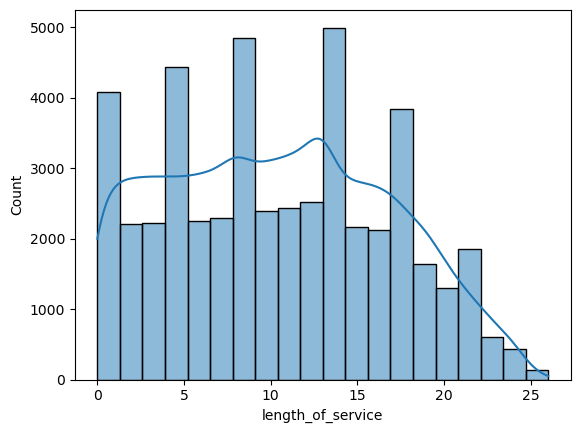

In [69]:
# Extreme values check

sns.histplot(df['length_of_service'], bins=20, kde = True)

<Axes: xlabel='year_of_record', ylabel='Count'>

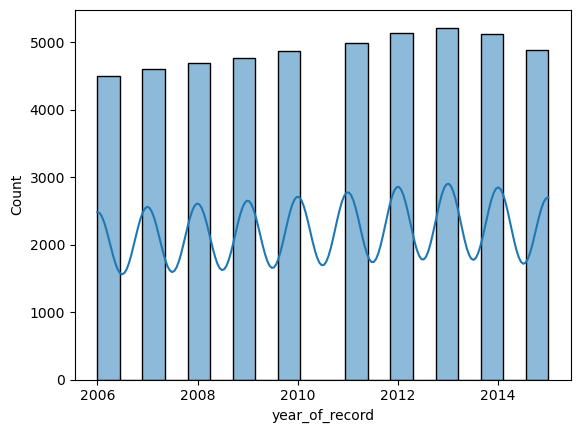

In [70]:
# Extreme values check

sns.histplot(df['year_of_record'], bins=20, kde = True)

In [71]:
# Select only the necessary columns and put them in a list called columns
columns = ["age","length_of_service","city_name","department_name","year_of_record","job_category","employ_status_flag","Hierarchy"]

In [72]:
# Create a subset

employee_attr = df[columns]

In [73]:
employee_attr.head()

,age,length_of_service,city_name,department_name,year_of_record,job_category,employ_status_flag,Hierarchy
0,52,17,Vancouver,Executive,2006,Board,1,3
1,53,18,Vancouver,Executive,2007,Board,1,3
2,54,19,Vancouver,Executive,2008,Board,1,3
3,55,20,Vancouver,Executive,2009,Board,1,3
4,56,21,Vancouver,Executive,2010,Board,1,3


In [74]:
type(employee_attr)

pandas.core.frame.DataFrame

In [75]:
employee_attr['city_name'] = employee_attr['city_name'].str.title()

C:\Users\swati\AppData\Local\Temp\ipykernel_4216\103318995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_attr['city_name'] = employee_attr['city_name'].str.title()


In [76]:
employee_attr.head()

,age,length_of_service,city_name,department_name,year_of_record,job_category,employ_status_flag,Hierarchy
0,52,17,Vancouver,Executive,2006,Board,1,3
1,53,18,Vancouver,Executive,2007,Board,1,3
2,54,19,Vancouver,Executive,2008,Board,1,3
3,55,20,Vancouver,Executive,2009,Board,1,3
4,56,21,Vancouver,Executive,2010,Board,1,3


<Axes: xlabel='age', ylabel='Count'>

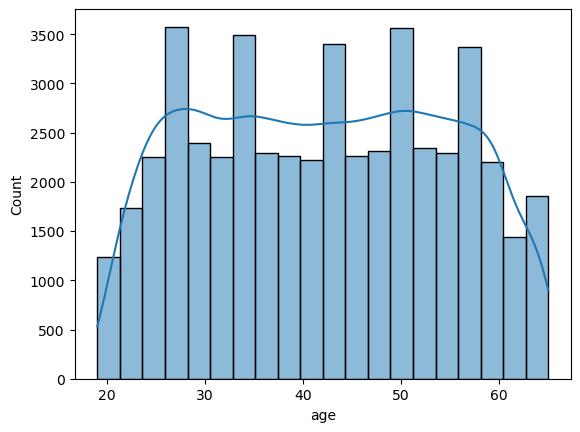

In [77]:
# Check the Hierarchy variable

sns.histplot(employee_attr['age'], bins=20, kde = True)

<Axes: xlabel='job_category', ylabel='Count'>

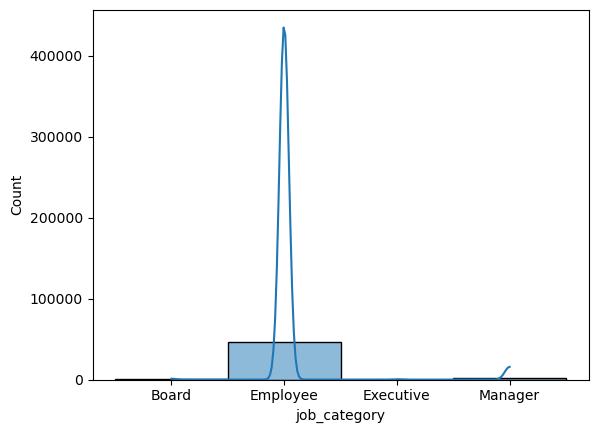

In [78]:
sns.histplot(employee_attr['job_category'], bins=20, kde = True)

In [79]:

# Select only the necessary columns and put them in a list called columns

columns = ["city_name", "population"]


In [80]:
# Create a subset

city_name_population = df[columns]

In [81]:
city_name_population.head()

,city_name,population
0,Vancouver,2437000
1,Vancouver,2437000
2,Vancouver,2437000
3,Vancouver,2437000
4,Vancouver,2437000


In [82]:
df['city_name'].value_counts()

Vancouver          11211
Victoria            4885
Nanaimo             3876
New Westminster     3465
Kelowna             2513
Burnaby             2067
Kamloops            2061
Prince George       2048
Cranbrook           1785
Surrey              1560
Richmond            1401
Terrace             1228
Chilliwack          1167
Trail                925
Langley              901
Vernon               898
Squamish             806
Quesnel              703
Abbotsford           681
North Vancouver      648
Williams Lake        617
West Vancouver       613
Port Coquitlam       545
Aldergrove           520
Fort Nelson          322
Nelson               317
Grand Forks          236
White Rock           231
Princeton            136
Dawson Creek         129
Bella Bella          126
Ocean Falls           65
Cortes Island         43
Dease Lake            18
Blue River             9
Name: city_name, dtype: int64

In [83]:
# Lets setup a folium map at a high-level zoom
map = folium.Map(tiles= 'Stamen Terrain',location=[55, -120], zoom_start=4.5, min_zoom=2)

# Now lets use the JSON file as base for the geographic locations and combine with the DF with the information we want. 
folium.Choropleth(
    geo_data = data,
    data=city_name_population,
    columns= ['city_name', 'population'],
    key_on = 'feature.properties.city_name',
    fill_color = 'Spectral', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Pop").add_to(map)
folium.LayerControl().add_to(map)
map